In [82]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
CCTV_Seoul = pd.read_csv('C:/Users/revol/\DataScience/data/CCTV_in_Seoul.csv', encoding = 'utf-8')
CCTV_Seoul.head()
CCTV_Seoul.columns
CCTV_Seoul.rename(columns = {CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [16]:
pop_Seoul = pd.read_excel('C:/Users/revol/DataScience/data/population_in_Seoul.xls', header = 2, usecols = 'B, D, G, J, N')
pop_Seoul.head()
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                           pop_Seoul.columns[2] : '한국인',
                           pop_Seoul.columns[3] : '외국인',
                           pop_Seoul.columns[4] : '고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [30]:
dates = pd.date_range('20130101', periods = 6) 
dates
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = ['A', 'B', 'C',' D'])
df.values
df.describe() #통계적 개요
df.sort_values(by = 'B', ascending = False)
df['20130102':'20130104'] #여기에 해당하는 인덱스를 출력함
df.loc[dates[0]] #location
df.loc[:, ['A', 'B']] # 모든 행의 컬럼 'A', 'B'만 보여줌
df.loc['20130102':'20130104', 'A':'C'] # 앞에는 행, 뒤는 열 각각 보여주고 싶으면 LIST로
df[df.A > 0]
df2 = df.copy() # 그냥 =로 이용해서 복사하면 데이터가 복사되는 것이 아니라 '위치'가 복사가 된다.
df.apply(np.cumsum) # cumsum : 누적합
df.apply(lambda x : x.max() - x.min())

A     3.553038
B     1.877193
C     1.200913
 D    2.666798
dtype: float64

In [36]:
CCTV_Seoul.head()
CCTV_Seoul.sort_values(by = '소계', ascending = True).head(5)
CCTV_Seoul.sort_values(by = '소계', ascending = False).head(5)
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by = '최근증가율', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [45]:
pop_Seoul['구별'].unique()
pop_Seoul[pop_Seoul['구별'].isnull()]
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [55]:
df1 = pd.DataFrame({'A' : ['A0', 'A1', 'A2', 'A3'],
                   'B' : ['B0', 'B1', 'B2', 'B3'],
                   'C' : ['C0', 'C1', 'C2', 'C3'],
                   'D' : ['D0', 'D1', 'D2', 'D3']}
                  ,index = [0, 1, 2, 3])
df4 = pd.DataFrame({'B' : ['B2', 'B3', 'B6', 'B7'],
                   'D' : ['D2', 'D3', 'D6', 'D7'],
                   'F' : ['F2', 'F3', 'F6', 'F7']},
                  index = [2, 3, 6, 7])
result = pd.concat([df1, df4], axis = 1, join = 'inner') #공통된 인덱스로 합침
#result = pd.concat([df1, df4], axis = 1, join_axes = [df1.index]) #df1인데스에 맞춤
result = pd.concat([df1, df4], ignore_index = True) #공통된 인덱스로 합침
result

left = pd.DataFrame({'key' :['K0', 'K4', 'K2', 'K3'],
                    'A' : ['A0', 'A1', 'A2', 'A3'],
                    'B' : ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key' :['K0', 'K1', 'K2', 'K3'],
                    'C' : ['C0', 'C1', 'C2', 'C3'],
                    'D' : ['D0', 'D1', 'D2', 'D3']})
pd.merge(left, right, on= 'key') #교집합으로 갖는거만
pd.merge(left, right, how = 'left', on = 'key')
pd.merge(left, right, how = 'right', on = 'key')
pd.merge(left, right, how = 'outer', on = 'key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [87]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()
data_result.set_index('구별', inplace = True)
data_result.sort_values(by = '소계').head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
도봉구,485,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
마포구,574,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110
송파구,618,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
중랑구,660,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
중구,671,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


In [61]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [62]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [63]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

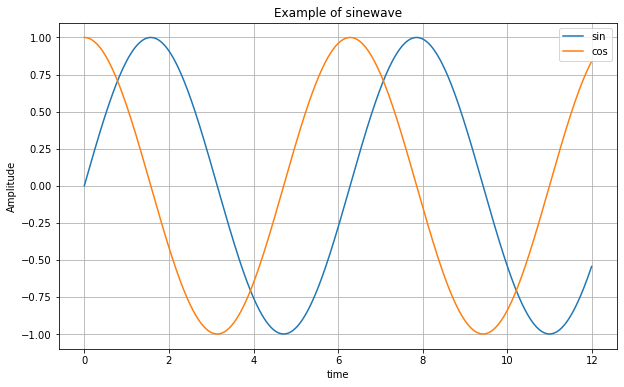

In [70]:
t = np.arange(0, 12, 0.01)
plt.figure(figsize = (10, 6))
plt.plot(t, np.sin(t), label = 'sin')
plt.plot(t, np.cos(t), label = 'cos')
plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

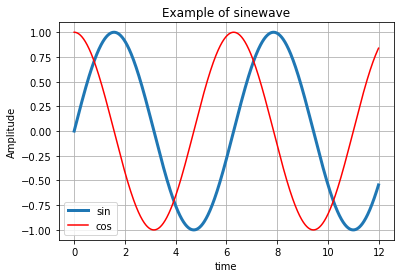

(0.5, 9.5)

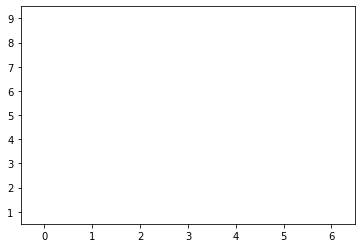

In [72]:
plt.plot(t, np.sin(t), lw=3, label = 'sin') #lw : 선의 굵기 지정
plt.plot(t, np.cos(t), 'r', label = 'cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()
#plt.plot(t, y, color = 'green', 'linestyle = 'dashed', marker = 'o')
#markerfacecolor : 마커의 색깔, markersize : 마커 사이즈, marker : 마커 ('>', 'o')
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])

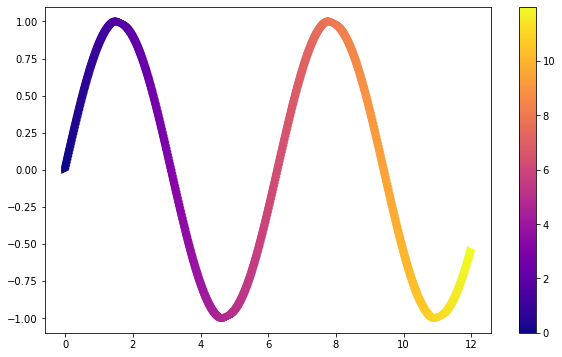

In [80]:
colormap = t
plt.figure(figsize = (10, 6))
#plt.scatter(t, y, s = 50, c = colormap, marker = '>')
plt.scatter(t, y, s = 50, c = t, marker = '>')
plt.plasma()
plt.colorbar()
plt.show()

In [81]:
s1 = np.random.normal(loc = 0, scale = 1, size = 1000)
s1

array([-2.28060946e-01, -6.08307045e-02, -7.27355451e-01,  7.05989159e-01,
       -2.07160954e-01, -4.60203605e-02,  1.82388009e+00, -1.53388052e+00,
       -9.04032839e-01, -3.23768867e-01,  1.22102036e+00, -1.15666158e+00,
        1.52582487e+00,  3.33460933e-01, -5.70875147e-01, -4.46014149e-01,
       -4.42653924e-04, -3.14923261e-01,  1.30268967e+00,  9.17921694e-01,
       -1.37827260e+00, -9.91248483e-01,  8.46687438e-01,  5.29492294e-01,
       -1.17080135e+00, -5.18099647e-01,  8.18783045e-02,  1.89082156e+00,
        2.79513586e-01, -5.02835371e-01,  2.65853412e-01, -1.76920015e+00,
       -9.64095129e-02, -1.39681829e+00, -1.08798536e-03,  1.16456151e+00,
       -6.12829244e-01,  8.71995039e-01, -6.71047664e-01, -3.97385253e-01,
       -8.97915948e-01,  5.92716180e-01,  2.06613555e+00,  2.66959161e-01,
        3.14533707e-01, -5.24460154e-01, -3.55681769e-01, -2.52884017e-01,
       -1.21330077e+00,  2.14990682e-01,  7.13810957e-01, -7.15763804e-01,
       -1.94050043e+00,  

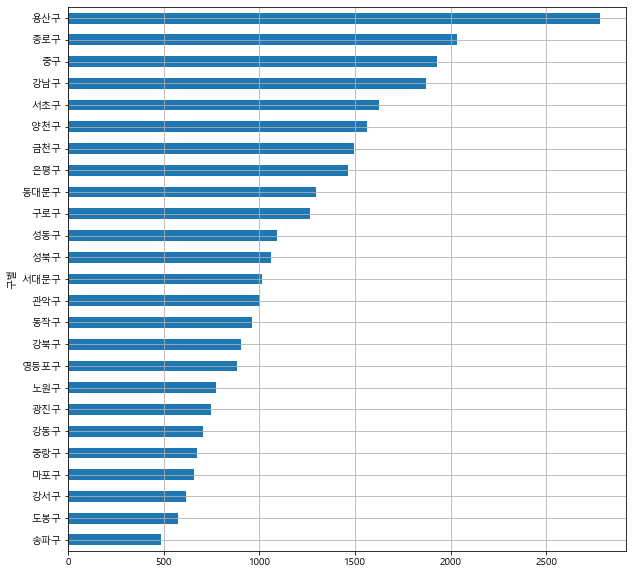

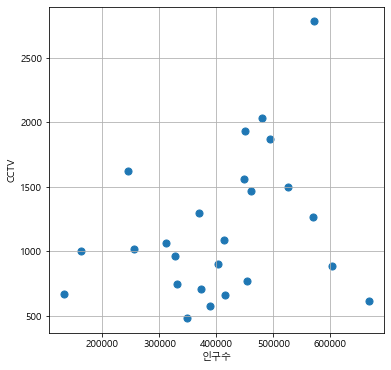

In [93]:
data_result['소계'].sort_values()
data_result['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()
plt.figure(figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

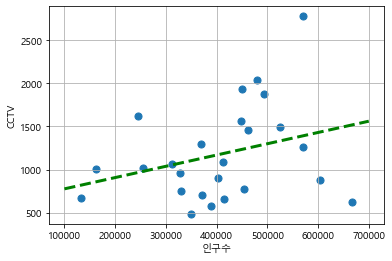

In [96]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [103]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by = '오차', ascending = False)
df_sort.head()

581910.0

In [ ]:
plt.figure(figsize = (14, 10))
plt.scatter(data_result['인구수'], data_result['소계'], 
           c = data_result['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize = 15)
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()